# Customer Segmentation Using KMeans and Machine Learning using Decision Tree and Random Forest

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


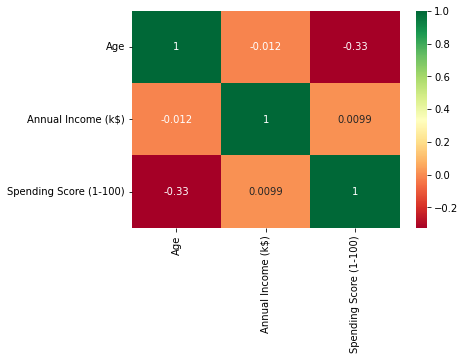

In [ ]:
sns.heatmap(df.drop(['CustomerID'],axis=1).corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
# fig.set_size_inches(10,8)
plt.show()

The only thing signifiant is the negative correlation between Spending Score and Age of -0.33 but its not negatively high enough to draw any conclusions. Maybe a displot may show us more

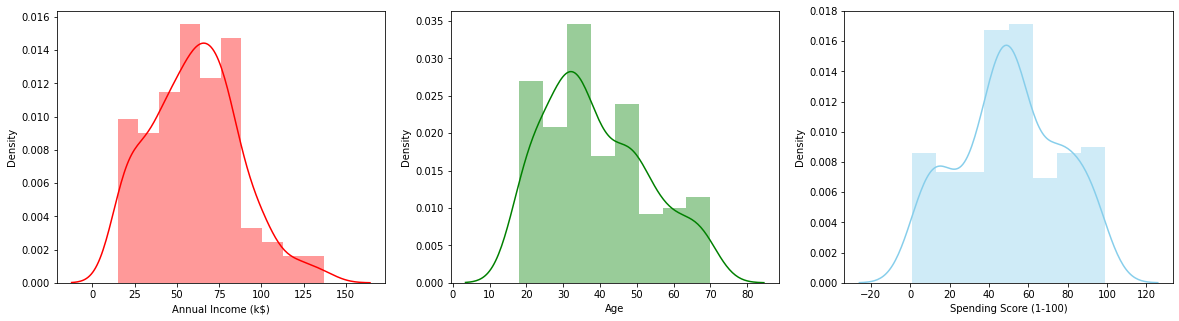

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)

sns.distplot(df["Annual Income (k$)"],color="red", label="Annual Income (k$)",ax=axes[0])

sns.distplot(df["Age"],color="green", label="Age",ax=axes[1])

sns.distplot(df["Spending Score (1-100)"],color="skyblue", label="Spending Score",ax=axes[2])

plt.show()

A concentration of the data captures customers with Annual Incomes between 25-75k, an age group of beween 20-45 and a spending score of between 40-60, let's split this distribution between Male and Female

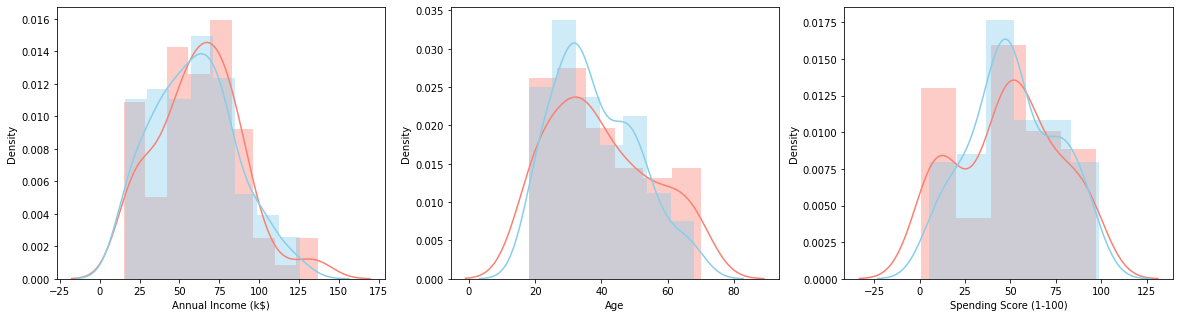

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)

sns.distplot(df["Annual Income (k$)"][df['Gender']=="Male"],color="salmon", label="Annual Income (k$)",ax=axes[0])
sns.distplot(df["Annual Income (k$)"][df['Gender']=="Female"],color="skyblue", label="Annual Income (k$)",ax=axes[0])
    
sns.distplot(df["Age"][df["Gender"]=="Male"],color="salmon", label="Age",ax=axes[1])
sns.distplot(df["Age"][df["Gender"]=="Female"],color="skyblue", label="Age",ax=axes[1])

sns.distplot(df["Spending Score (1-100)"][df["Gender"]=="Male"],color="salmon", label="Spending Score",ax=axes[2])
sns.distplot(df["Spending Score (1-100)"][df["Gender"]=="Female"],color="skyblue", label="Spending Score",ax=axes[2])

plt.show()

The displot above seem to indicate for Annual Income and Age distributions, Male and Female share almost the same distribution but as for spending score, the distribution plot suggest that Female customers tend to have higher spending scores than compared to male customers. Let's try this on a and a bee swarm and scatter plot as well as a scatter matrix

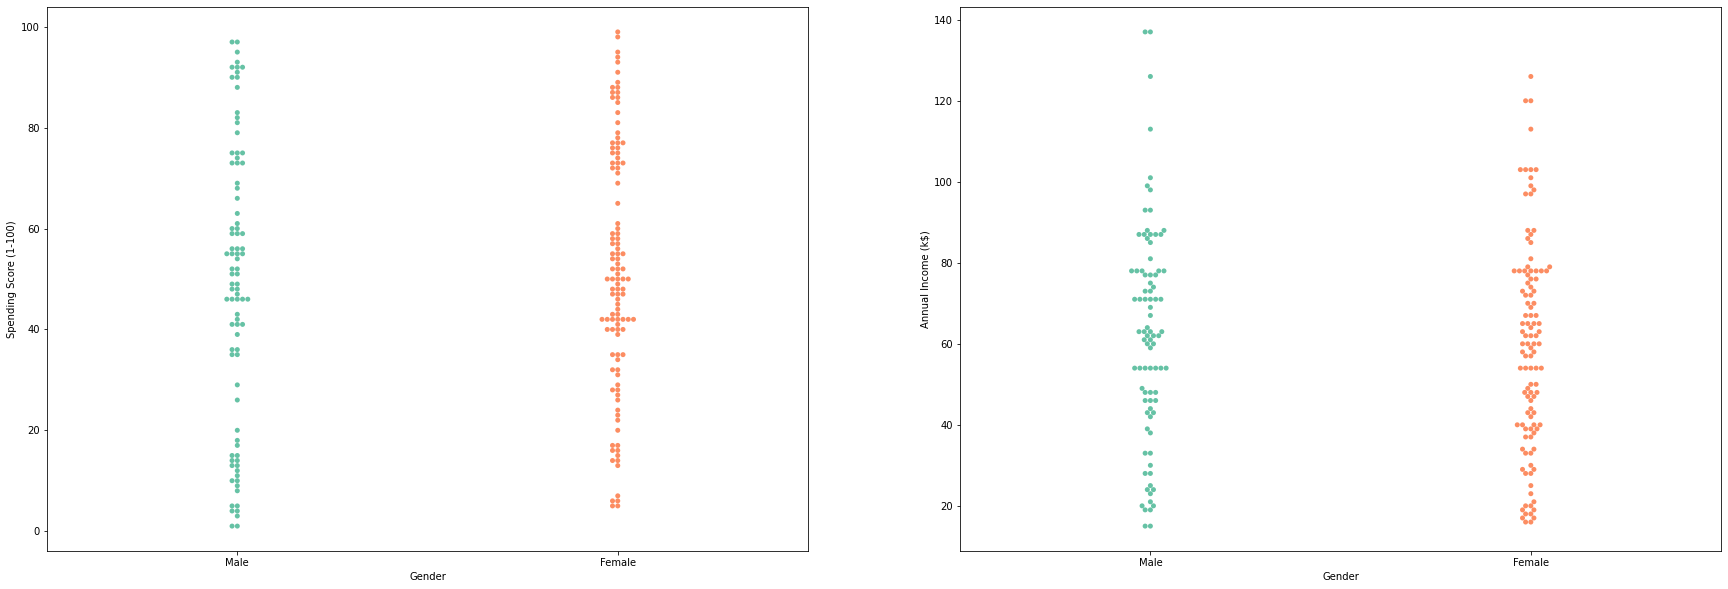

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(30, 10)) #sharex=True)
sns.swarmplot(x="Gender", y="Spending Score (1-100)",data=df, palette="Set2", dodge=True, ax=axes[0])
sns.swarmplot(x="Gender", y="Annual Income (k$)",data=df, palette="Set2", dodge=True, ax=axes[1])
plt.show()

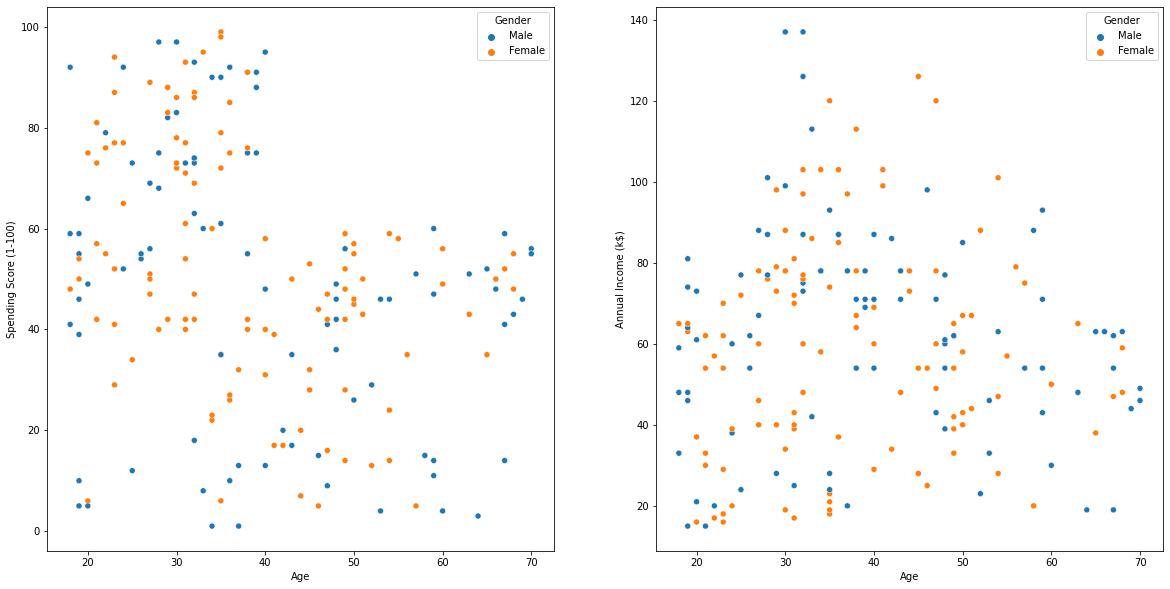

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 10)) #sharex=True)
sns.scatterplot(x="Age", y="Spending Score (1-100)",hue="Gender", data=df, ax=axes[0])
sns.scatterplot(x="Age", y="Annual Income (k$)",hue="Gender", data=df, ax=axes[1])
plt.show()

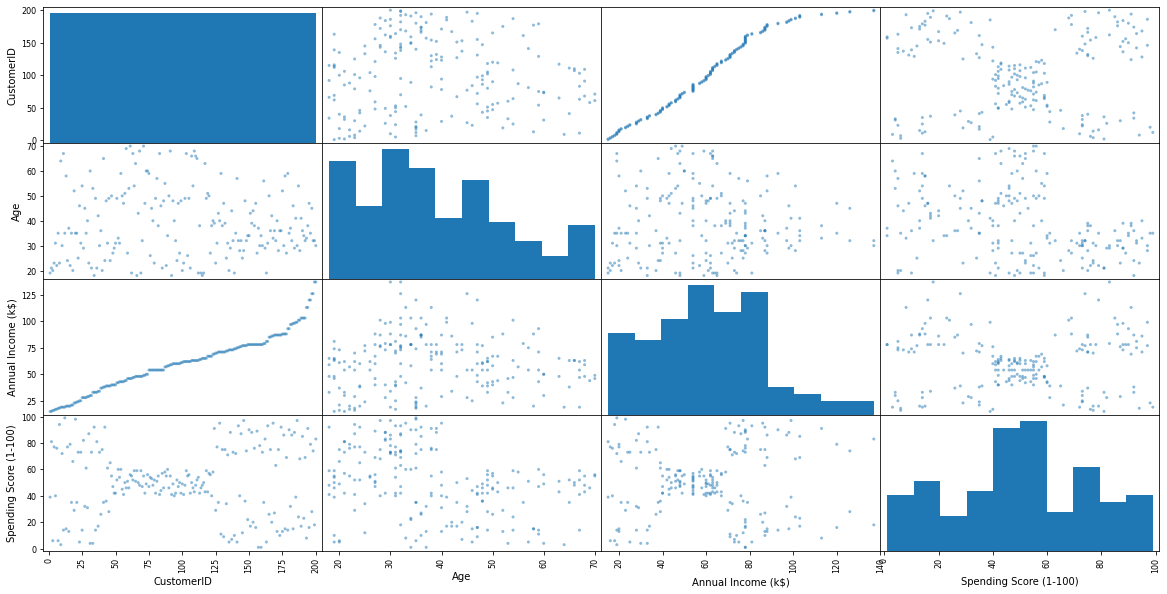

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20,10))
plt.show()

The scatter matrix seems to indicate that there are some clusters to explore in the Spending Scores and Annual Income plot, lets see if we can distingush the plots between male and female and see if there is a trend

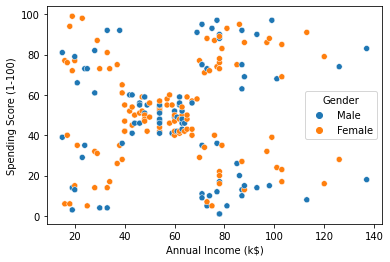

In [ ]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue="Gender", data=df)
plt.show()

### 3D-plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

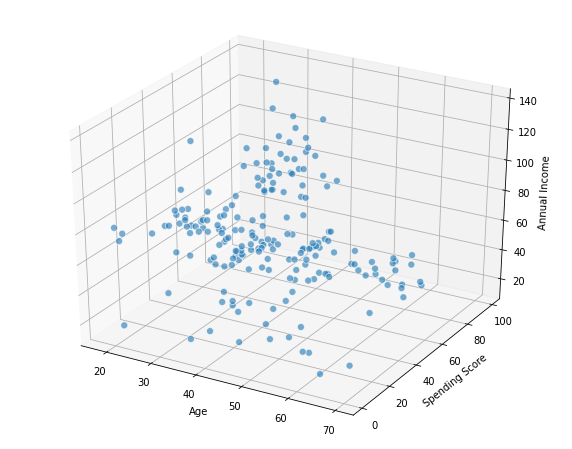

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

xs = df["Age"]
ys = df["Spending Score (1-100)"]
zs = df["Annual Income (k$)"]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors="w")

ax.set_xlabel("Age")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Annual Income")

plt.show()

Insights:
1. Spending Scores tend to be higher among customer who are between 25-40 years old
2. Female in general tend to have higher Spending Scores than compared to male, especially for females around the age of 
25-40
3. The clustering of datapoints in the spending score and annual income plot seems to indicate certain types of consumer groups in te datasets with different spending behaviors

## KMeans Clustering

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.cluster import KMeans

In [ ]:
X_k = df["Annual Income (k$)"].values
y_k = df["Spending Score (1-100)"].values

In [ ]:
X_k1 = df[["Annual Income (k$)" , "Spending Score (1-100)"]].iloc[: , :].values

In [ ]:
model = KMeans(n_clusters=5)    # setting the number of clusters to 5
model.fit(X_k1)

KMeans(n_clusters=5)

In [ ]:
y_kmeans = model.fit_predict(X_k1)

In [ ]:
model.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

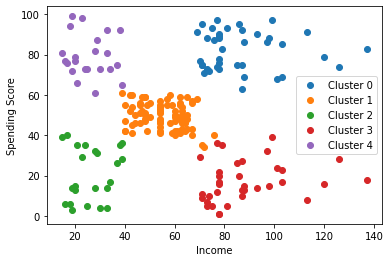

In [ ]:
unique_labels = set(model.labels_)
for c in unique_labels:  
    plt.scatter(X_k1[model.labels_ == c, 0],
                X_k1[model.labels_ == c, 1],
                label="Cluster {}".format(c))
    

plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Based on the clusters, there are 5 groups of interest to us

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier().fit(X_k1, y_k)

In [ ]:
model

DecisionTreeClassifier()

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    # ax.axis('tight')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    # n_classes = len(np.unique(y))
    # contours = ax.contourf(xx, yy, alpha=0.3,
    #                        levels=np.arange(n_classes + 1) - 0.5,
    #                        cmap=cmap, clim=(y.min(), y.max()),
    #                        zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

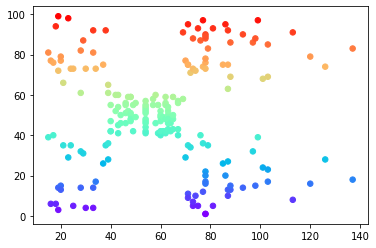

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X_k1, y_k)